In [1]:
import numpy as np

In [2]:
file_path = r"C:\Users\zhang\Desktop\md\las_paper\19k_log\cry_1000p_out.xyz"

In [43]:
start_frame = 0
end_frame = 250
step_frame = 1
########
ana_element = ['Li']

In [44]:
import numpy as npbo

def cal_msd(frame_i, frame_0, box_size, time):
    # 将输入转换为 NumPy 数组
    frame_0, frame_i, box_size = np.array(frame_0), np.array(frame_i), np.array(box_size)
    # 计算坐标差值
    delta = frame_i - frame_0
    # 归一化坐标差值，确保在周期性边界条件下正确计算
    normalized_delta = delta / box_size
    delta -= np.round(normalized_delta)*box_size
    # 计算均方位移
    msd = np.sum(np.square(delta)) / (len(frame_i))
    return msd

In [45]:
# 示例用法
frame_i = [[9.0, 7.0, 3.0]]
frame_0 = [[1, 4, 9]]
box_size = [10.0, 10.0, 10.0]
time = 1.0
result = cal_msd(frame_i, frame_0, box_size, time)
print(result)

29.0


In [46]:
x = 2*2+3*3+4*4
print(x)

29


In [47]:
def read_xyz_frames(file_path):
    frames = []
    current_frame = None

    with open(file_path, 'r') as file:
        lines = file.readlines()
        line_index = 0

        while line_index < len(lines):
            line = lines[line_index].strip()

            if line.isdigit():
                # 读取原子数
                if current_frame:
                    frames.append(current_frame)
                num_atoms = int(line)
                current_frame = {"num_atoms": num_atoms, "atoms": []}
                line_index += 2  # 跳过标题行 "Atoms"
            else:
                # 读取原子坐标
                if current_frame:
                    atom_data = line.split()
                    if len(atom_data) == 4:
                        element, x, y, z = atom_data
                        current_frame["atoms"].append({
                            "element": element,
                            "x": float(x),
                            "y": float(y),
                            "z": float(z)
                        })
                line_index += 1

        if current_frame:
            frames.append(current_frame)

    return frames

# 使用之前的frames列表
frames = read_xyz_frames(file_path)

# 找出最大的x、y和z值
max_x = max([max(frame["atoms"], key=lambda atom: atom["x"])["x"] for frame in frames])
max_y = max([max(frame["atoms"], key=lambda atom: atom["y"])["y"] for frame in frames])
max_z = max([max(frame["atoms"], key=lambda atom: atom["z"])["z"] for frame in frames])

print("Maximum X value:", max_x)
print("Maximum Y value:", max_y)
print("Maximum Z value:", max_z)


Maximum X value: 85.104181
Maximum Y value: 55.32266
Maximum Z value: 11.50457


In [48]:
box_all = np.array([max_x,max_y,max_z])+0.01
print(box_all)

[85.114181 55.33266  11.51457 ]


In [49]:
frame_zero = []
for i in frames[0]['atoms']:
        if i['element'] in ana_element:
            frame_zero.append([i['x'],i['y'],i['z']])
frame_zero = np.array(frame_zero)
box_0 = np.max(frame_0, axis=0)+ 0.01
print(frame_zero)

[[1.3586482e+01 3.2933725e+01 1.7095400e+00]
 [8.3956882e+01 4.8352225e+01 9.8742500e+00]
 [7.2706082e+01 6.1838750e+00 8.8684900e+00]
 ...
 [5.1259882e+01 5.0074525e+01 6.5106800e+00]
 [4.9023382e+01 4.4623025e+01 1.0212870e+01]
 [5.6901082e+01 5.4419925e+01 1.7390000e-02]]


In [50]:
msd_result = []
time = np.linspace(0,80,len(frames))   #单位ns
for frame_i,frame in enumerate(frames):
    time_i = time[frame_i]
    atom_list = []
    for i in frame['atoms']:
        if i['element'] in ana_element:
            atom_list.append([i['x'],i['y'],i['z']])
    atom_list = np.array(atom_list)
    box = np.max(atom_list, axis=0)
    res = cal_msd(atom_list,frame_zero,box,time_i)
    msd_result.append(res)

In [51]:
import matplotlib.pyplot as plt

In [52]:
x_list = np.linspace(0,80,len(msd_result))

In [53]:
#

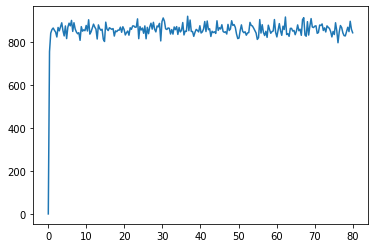

In [54]:
plt.plot(x_list[0:],msd_result[0:])

In [55]:
# 存储
for i in range(len(msd_result)):
    print(msd_result[i])

0.0
755.0444121965012
841.2544010195977
857.8256298388415
864.8743069807832
854.5722775355208
845.9880638669713
823.1843263756242
867.4766545254622
851.7444007392132
869.9404997356194
889.1570665401704
852.7352803887148
828.1236444759793
874.4950401303356
815.757905851256
868.5254587943092
887.4864848479233
875.1205542157495
900.3296831008063
849.0908408889811
889.4875551597138
860.5221439777405
846.2155469266442
838.1691841874439
843.3381229126409
807.6062136299913
871.3159525455965
850.0969600317029
856.5305677030574
852.2740047574928
876.8193963018671
850.9950630000557
903.3231077739921
836.497097562798
847.2556036942574
864.9534210114446
882.9099238008184
869.5130785764533
859.4786909393572
813.7651591547432
879.3728857706649
862.7442829424075
854.6592320666771
859.2179090220537
812.8183229307366
802.258256280206
892.1980649924756
860.1580664155013
853.0004301361728
866.0911812832222
862.2579284450159
858.7137122765587
862.376304740679
827.4510068752511
851.5974264416875
847.913412